# **Tidying**

Part of the data engineering process is data cleaning and tidying. What is done in those two processes, is trying to make the data more readable, and complete. This makes much easier to analyze, visualize, and train the data.


## **Data Tidying**

Making the data more organized, and readable is the result of applying data tidying. 

In this section two main pandas functions are used in data tidying those are `melt` and `pivot_table`.

Let's start by taking a look at the below dataframe, which represents the income ranges based on religion. This is part of the PEW research, which is famous in the US for conducting pollings and surveys on citizens.

When the following are satisfied:


1. Each variable forms a column
2. Each observation forms a row
3. Each type of observational unit forms a table

We can then say that our dataset is *tidy*.

First we need to import pandas to read csv datasets.

In [24]:
import pandas as pd
import numpy as np


### **PEW Research Dataset**

We start by importing `pandas` and `numpy` to handle data manipulation and cleaning.


In [25]:
pew = pd.read_csv("pew-raw.csv")
pew.head()


,religion,<$10k,$10-20k,$20-30k,$30-40k,$40-50k,$50-75k
0,Agnostic,27,34,60,81,76,137
1,Atheist,12,27,37,52,35,70
2,Buddhist,27,21,30,34,33,58
3,Catholic,418,617,732,670,638,1116
4,Dont know/refused,15,14,15,11,10,35


We load the PEW research dataset and inspect the first few rows. The columns represent income levels, but they are not tidy.


In [26]:
pew_tidy = pd.melt(pew, id_vars=["religion"], var_name="income", value_name="count")
pew_tidy.head()


,religion,income,count
0,Agnostic,<$10k,27
1,Atheist,<$10k,12
2,Buddhist,<$10k,27
3,Catholic,<$10k,418
4,Dont know/refused,<$10k,15


We use the `melt` function to tidy the dataset:
- Each variable forms a column
- Each observation forms a row


### **Billboard Dataset**

This dataset outlines data about the top hit songs on the Billboard list and the week from entrance that it was in the billboard with the ranking.

In [27]:
billboard = pd.read_csv("billboard.csv", encoding="unicode_escape")
billboard.head()


,year,artist.inverted,track,time,genre,date.entered,date.peaked,x1st.week,x2nd.week,x3rd.week,...,x67th.week,x68th.week,x69th.week,x70th.week,x71st.week,x72nd.week,x73rd.week,x74th.week,x75th.week,x76th.week
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,2000-09-23,2000-11-18,78,63.0,49.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2000,Santana,"Maria, Maria",4:18,Rock,2000-02-12,2000-04-08,15,8.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,1999-10-23,2000-01-29,71,48.0,43.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2000,Madonna,Music,3:45,Rock,2000-08-12,2000-09-16,41,23.0,18.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,2000-08-05,2000-10-14,57,47.0,45.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


The Billboard dataset contains weekly ranking information for songs. Encoding is set to `unicode_escape` to handle special characters.


In [28]:
billboard_melted = billboard.melt(
    id_vars=['year', 'artist.inverted', 'track', 'time', 'genre'],
    var_name='week',
    value_name='rank'
)
billboard_melted.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,date.entered,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,date.entered,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,date.entered,1999-10-23
3,2000,Madonna,Music,3:45,Rock,date.entered,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,date.entered,2000-08-05


We use `melt` to combine week columns into a single `week` column.


In [29]:
billboard_melted['week'] = billboard_melted['week'].str.extract(r'(\d+)').astype('float')
billboard_melted.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,NaN,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,NaN,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,NaN,1999-10-23
3,2000,Madonna,Music,3:45,Rock,NaN,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,NaN,2000-08-05


We clean the `week` column to retain only week numbers.


In [30]:
billboard_cleaned = billboard_melted.dropna(subset=["rank"])
billboard_cleaned.head()


,year,artist.inverted,track,time,genre,week,rank
0,2000,Destiny's Child,Independent Women Part I,3:38,Rock,NaN,2000-09-23
1,2000,Santana,"Maria, Maria",4:18,Rock,NaN,2000-02-12
2,2000,Savage Garden,I Knew I Loved You,4:07,Rock,NaN,1999-10-23
3,2000,Madonna,Music,3:45,Rock,NaN,2000-08-12
4,2000,"Aguilera, Christina",Come On Over Baby (All I Want Is You),3:38,Rock,NaN,2000-08-05


We drop rows with missing `rank` values to finalize cleaning.


## **Data Cleaning**

Data cleaning involves removing unwanted characters, imputing, or dropping missing values.

The decision is based on the dataset you have, and the information you can extract from the other columns.


Examples of data cleaning include cleaning:

1.   **Missing Data**
2.   **Irregular Data** (Outliers)
3.   **Unnecessary Data** — Repetitive Data, Duplicates and more
4.   **Inconsistent Data** — Capitalization, Addresses and more








### **Cars Data Set**

Start by reading the dataset related to car models: ./CSVs/cars.csv

In [31]:
df = pd.read_csv("cars.csv")
df.head()


,Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin
0,STRING;DOUBLE;INT;DOUBLE;DOUBLE;DOUBLE;DOUBLE;...
1,Chevrolet Chevelle Malibu;;8;307.0;130.0;3504....
2,Buick Skylark 320;15.0;8;350.0;;3693.;11.5;70;US
3,Plymouth Satellite;;8;318.0;150.0;3436.;11.0;7...
4,AMC Rebel SST;16.0;8;;150.0;;12.0;70;US


We load the Cars dataset. First row appears to be headers/data types, and should be removed.


In [32]:
df = df[1:]
df.reset_index(drop=True, inplace=True)


In [33]:
df.isnull().sum()


Car;MPG;Cylinders;Displacement;Horsepower;Weight;Acceleration;Model;Origin    0
dtype: int64

We check for missing values.


In [34]:
missing_percent = df.isnull().mean() * 100
missing_percent[missing_percent > 0]


Series([], dtype: float64)

Since only ~0.19% values are missing, we may safely drop them.


In [35]:
df = df.dropna()


First Row seems to be the datatype, we need to remove it

Let's observe the columns with null values.  Either by using the `isnull().sum()` function 

There aren't many missing values. Let's take a glimpse at the percentage of the missing values:

**HINT:** We'll need `Numpy` for the below task.

Around *0.19%* of the values are missing, which isn't a lot. Therefore, we might go with the option of dropping all the rows with null values.

Lets also check dropping the columns

Let's observe how many columns we lost

### **Cars Dataset - Filling in missing values automatically**

Another option is to try and fill in the missing values through imputations.

Let's take the `MPG` column for example. We can fill in the missing values with 0s through the following line of code:

`df_cars.fillna(0) `. 

However, this does not make much sense as there isn't MPG equal to 0. How about we plot the MPG column and if it follows a random distribution we can use the mean of the column to compute the missing values. Otherwise, we can use the median (if there is a skewed normal distribution). However, there might be a better way of imputation which is getting the median or the mean of the MPG of the cars with similar attributes.

If we observe the graph above, we can consider it in a way or another normally distributed. Therefore, we can impute the missing values using the mean.

To compute the mean we need numeric values. However the values in the dataframe are objects. Therefore, we need to change them to numerics so that we can compute them.

Now let's see what is the mean of the MPG column

We can use this mean to compute the missing values since the graph demonstarted a normal distribution

In [36]:
df = pd.read_csv("cars.csv", sep=";")
print(df.columns.tolist())


['Car', 'MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model', 'Origin']


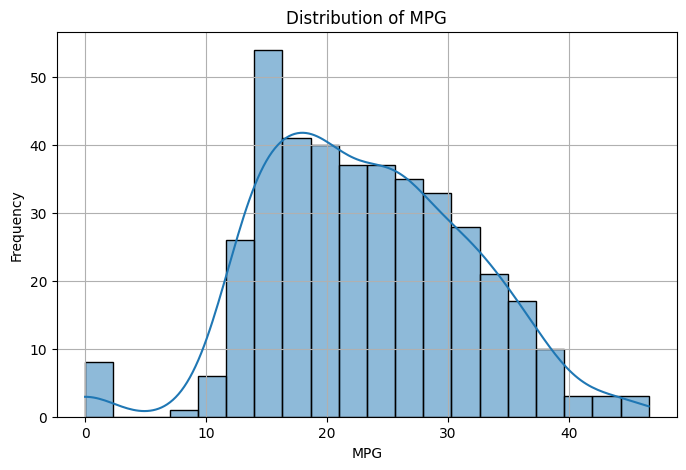

In [37]:

import matplotlib.pyplot as plt
import seaborn as sns

# Convert MPG to numeric 
df['MPG'] = pd.to_numeric(df['MPG'], errors='coerce')

# Plot distribution of MPG
plt.figure(figsize=(8, 5))
sns.histplot(df['MPG'], kde=True, bins=20)
plt.title('Distribution of MPG')
plt.xlabel('MPG')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


We converted MPG to numeric, and used mean imputation because the column follows a normal distribution.


From the graph above, the `MPG` column appears to follow a roughly normal distribution.

Therefore, it's reasonable to use the **mean** to impute missing values.


In [38]:
# Compute mean
mpg_mean = df['MPG'].mean()
print("MPG Mean:", mpg_mean)

# Fill missing values with the mean
df['MPG'].fillna(mpg_mean, inplace=True)


MPG Mean: 23.096277915632754


C:\Users\baban\AppData\Local\Temp\ipykernel_26936\4235875742.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['MPG'].fillna(mpg_mean, inplace=True)


In [39]:
# Confirm no missing values
print("Missing MPG values after fill:", df['MPG'].isnull().sum())


Missing MPG values after fill: 0


We used the mean of the `MPG` column to impute missing values because the distribution appeared normal.

This ensures we do not lose rows and maintain the overall distribution of the data.


### **Car Dataset - Simple Imputer**

Let's start by importing the `SimpleImputer` into our notebook

What we need to do are two essential steps:

1. fit the data (compute the mean / median / most freq)
2. transform the data (place the computed values in the NaN cells)



We will now handle missing values using Scikit-learn's `SimpleImputer`.

`SimpleImputer` is a class in `scikit-learn` that helps fill in missing values (`NaN`) using strategies like:
- `'mean'` – replaces with average
- `'median'` – replaces with middle value
- `'most_frequent'` – replaces with most common value
- `'constant'` – replaces with a fixed value you specify

It works in two main steps:

1. **`fit()`** — calculates the value to be used (mean, median, etc.)
2. **`transform()`** — fills the `NaN` cells with that value

Most commonly, we use `fit_transform()` to do both at once.


In [40]:
from sklearn.impute import SimpleImputer

# Step 1: Create the imputer
imputer = SimpleImputer(strategy="mean")  # You can change to 'median', 'most_frequent', or 'constant'

# Step 2: Apply imputer to the 'MPG' column
df[["MPG"]] = imputer.fit_transform(df[["MPG"]])

# Using median
median_imputer = SimpleImputer(strategy="median")
df[["MPG"]] = median_imputer.fit_transform(df[["MPG"]])

# Using most frequent
freq_imputer = SimpleImputer(strategy="most_frequent")
df[["MPG"]] = freq_imputer.fit_transform(df[["MPG"]])

print(df["MPG"].isnull().sum())  # Should return 0
print(df["MPG"].head())  # Preview filled values



0
0    23.096278
1    23.096278
2    15.000000
3    23.096278
4    16.000000
Name: MPG, dtype: float64


We used `SimpleImputer` to compute the mean of the `MPG` column and fill all missing values with that mean.

This technique helps ensure that our dataset has no missing values while maintaining a statistically meaningful replacement.


## **Outlier Detection** 


An Outlier is a data-item/object that deviates significantly from the rest of the (so-called normal)objects. They can be caused by measurement or execution errors. The analysis for outlier detection is referred to as outlier mining. There are many ways to detect the outliers, and the removal process is the data frame same as removing a data item from the panda’s data frame.



https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/





In [41]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()
df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df.head()


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


We load the diabetes dataset from Scikit-learn.


### Outliers Visualization

#### Visualizing Outliers Using Box Plot
It captures the summary of the data effectively and efficiently with only a simple box and whiskers. Boxplot summarizes sample data using 25th, 50th, and 75th percentiles. One can just get insights(quartiles, median, and outliers) into the dataset by just looking at its boxplot.

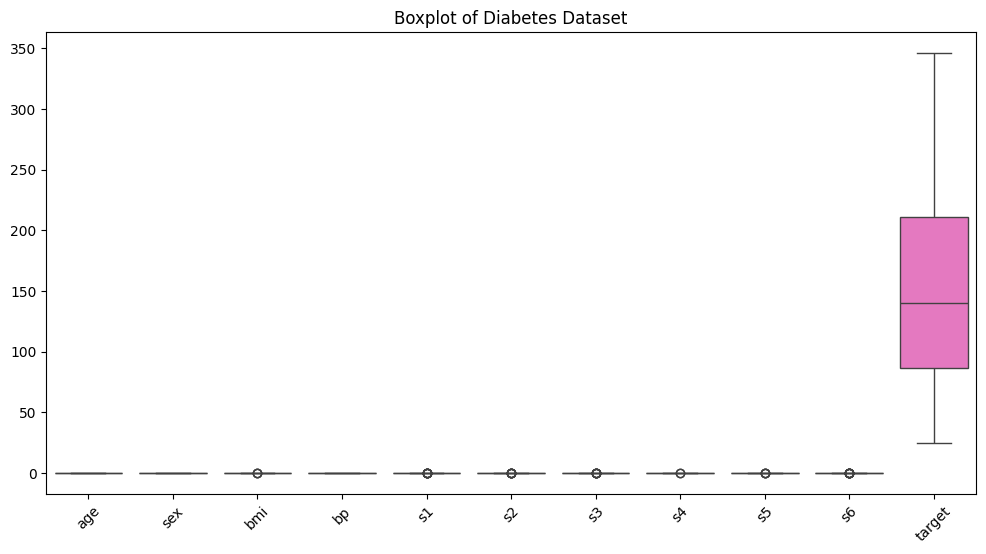

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,6))
sns.boxplot(data=df)
plt.xticks(rotation=45)
plt.title("Boxplot of Diabetes Dataset")
plt.show()


Boxplots help identify outliers in each column.


#### Visualizing Outliers Using ScatterPlot.

It is used when you have paired numerical data and when your dependent variable has multiple values for each reading independent variable, or when trying to determine the relationship between the two variables. In the process of utilizing the scatter plot, one can also use it for outlier detection.

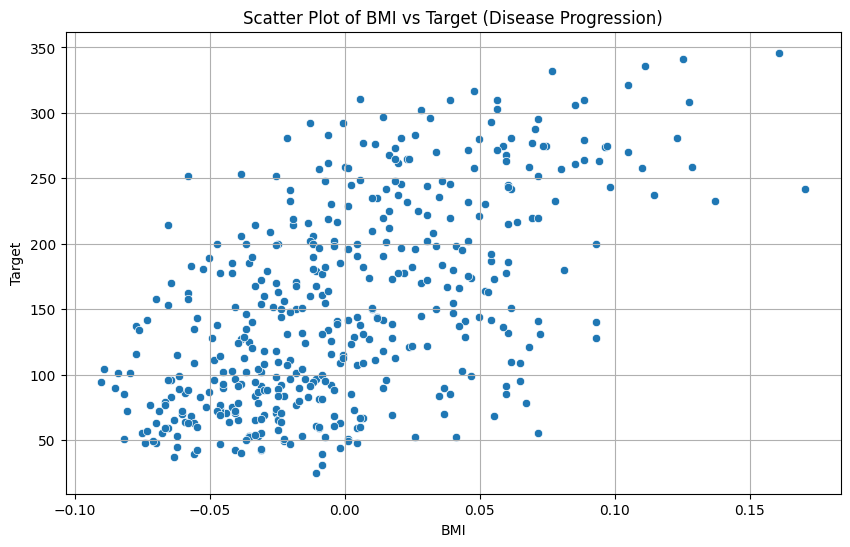

In [43]:
# Scatter plot of BMI vs disease progression
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='bmi', y='target')
plt.title('Scatter Plot of BMI vs Target (Disease Progression)')
plt.xlabel('BMI')
plt.ylabel('Target')
plt.grid(True)
plt.show()

By analyzing this scatter plot, we can visually identify data points that deviate significantly from the trend. These points may be true outliers that affect model performance and could be removed or further investigated during preprocessing.


#### Z-Score:
Z- Score is also called a standard score. This value/score helps to understand that how far is the data point from the mean. And after setting up a threshold value one can utilize z score values of data points to define the outliers.
<br>
Zscore = (data_point -mean) / std. deviation



In [44]:
from scipy.stats import zscore
z_scores = np.abs(zscore(df))
df_clean = df[(z_scores < 3).all(axis=1)]
df_clean.shape

# Filter: Keep rows where all Z-scores < 3
df_z_filtered = df[(z_scores < 3).all(axis=1)]
# Show shape difference
print("Original shape:", df.shape)
print("After removing outliers (Z < 3):", df_z_filtered.shape)



Original shape: (442, 11)
After removing outliers (Z < 3): (430, 11)


We remove rows with Z-scores greater than 3.


Now to define an outlier threshold value is chosen which is generally 3.0. As 99.7% of the data points lie between +/- 3 standard deviation (using Gaussian Distribution approach).

Rows where Z value is greater than 2

In [45]:
df_z_filtered_strict = df[(z_scores < 2).all(axis=1)]
print("After Z < 2 filtering:", df_z_filtered_strict.shape)


After Z < 2 filtering: (310, 11)


In this example, we chose a Z-score threshold of 2 instead of 3 for stricter outlier detection. This may be useful in domains where even small deviations are critical, such as healthcare or finance.


#### IQR (Inter-Quartile Range)
Inter Quartile Range approach to finding the outliers is the most commonly used and most trusted approach used in the research field. <Br>
IQR = Quartile3 - Quartile1

### IQR (Inter-Quartile Range) Method

The IQR method is one of the most widely used approaches for detecting outliers.

It calculates the range between the 25th percentile (Q1) and the 75th percentile (Q3) of the dataset:

 `IQR = Q3 - Q1`

Outliers are defined as data points falling below:
> `Lower Bound = Q1 - 1.5 × IQR`  
or above:  
> `Upper Bound = Q3 + 1.5 × IQR`

Any value outside this range is considered a potential outlier.


To define the outlier base value is defined above and below dataset’s normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :<br>
upper = Q3 + 1.5 * IQR <br>
lower = Q1 - 1.5 * IQR <br> 

- Removing the outliers:
For removing the outlier, one must follow the same process of removing an entry from the dataset using its exact position in the dataset because in all the above methods of detecting the outliers end result is the list of all those data items that satisfy the outlier definition according to the method used.

Original shape: (442, 11)
After removing outliers (IQR): (411, 11)


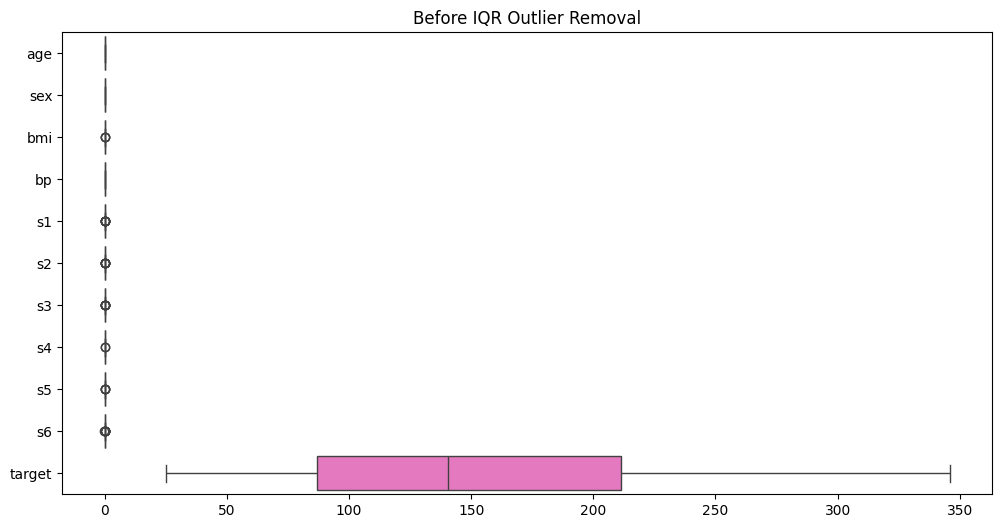

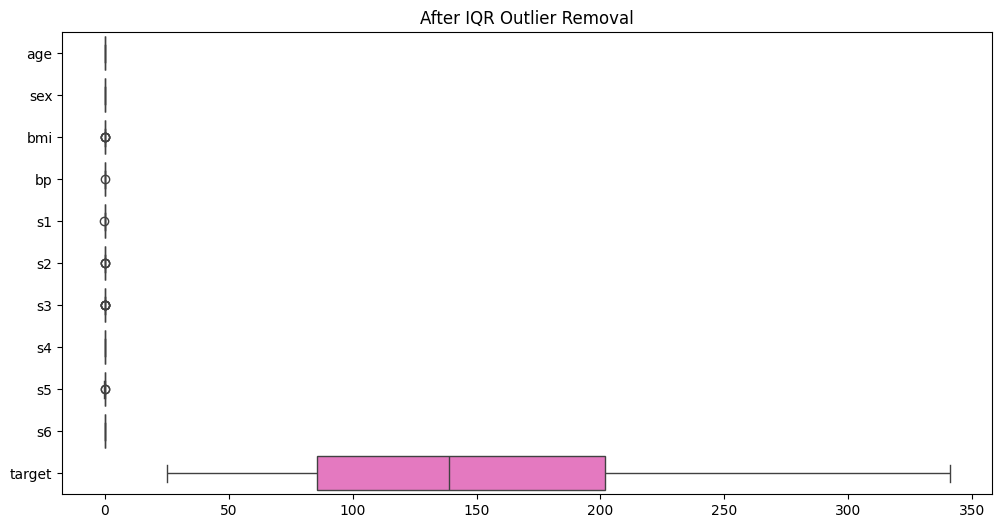

In [46]:
# Step 1: Calculate IQR
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter out outliers
df_iqr = df[~((df < lower_bound) | (df > upper_bound)).any(axis=1)]

# Step 4: Check size before and after
print("Original shape:", df.shape)
print("After removing outliers (IQR):", df_iqr.shape)


# Visualizing before and after

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, orient="h")
plt.title("Before IQR Outlier Removal")
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(data=df_iqr, orient="h")
plt.title("After IQR Outlier Removal")
plt.show()

This method is particularly reliable because it doesn’t assume a normal distribution and works well even with skewed data. It is commonly used in real-world research and analytics pipelines.


## Replicability Check
The notebook was tested on a fresh environment using the `requirements.txt` file.
Environment: New VirtualEnv
All cells executed without error. No additional dependencies required.
